On a dans cette étude 4 datasets, représentant chacun une classe de notre problème : 
- AIR.csv : Des mesures de l'air sans aucun souffle d'un patient contenant : 10 mesures prises sur 8 variables différentes (donc 80 colonnes) d'une longueur de 4080 echantillons
- CONTROL.csv : Des mesures prises avec le souffle de patients saines : 10 patients x 8 variables (capteurs) x 2 prise = 160 colonnes de 4000 échantillons
- COPD.csv : Des mesures prises avec le souffle de patients atteints de COPD : 20 patients x 8 variables x 2 prises = 320 colonnes de 4000 échantillons
- SMOKERS.csv : Des mesures prises avec le souffle de patients fumeurs : 8 patients x 8 variables x 2 prises = 128 colonnes de 4000 échantillons


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
import os

## Chargement des données
On commence par charger nos différents datasets pour les visualiser

In [25]:
data_air = pd.read_csv('./csv_files/AIR.csv', sep=";", header=None)
data_control = pd.read_csv('./csv_files/CONTROL.csv', sep=";", header=None)
data_copd = pd.read_csv('./csv_files/COPD.csv', sep=";", header=None)
data_smokers = pd.read_csv('./csv_files/SMOKERS.csv', sep=";", header=None)

## Analyse des données
On procède à une rapide exploration des données des différents datasets.
### AIR

In [26]:
data_air.describe()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
count,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,...,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000
mean,0.541888,1.793385,0.318941,1.665513,1.598276,0.311861,0.666531,1.689312,0.538813,1.826538,...,0.655388,1.866912,0.528826,1.885779,0.336377,1.735515,2.085760,0.303188,0.661857,1.963747
std,0.004584,0.003277,0.000697,0.011345,0.009805,0.000961,0.001967,0.004786,0.046796,0.157291,...,0.004409,0.003347,0.010249,0.030719,0.007071,0.035740,0.019045,0.003754,0.005276,0.041566
min,0.536000,1.784000,0.317000,1.633000,1.587000,0.310000,0.663000,1.682000,0.000000,0.000000,...,0.649000,1.859000,0.498000,1.847000,0.327000,1.688000,2.046000,0.300000,0.653000,1.908000
25%,0.538000,1.791000,0.319000,1.660000,1.591000,0.311000,0.665000,1.685000,0.539000,1.836000,...,0.651000,1.864000,0.524000,1.862000,0.331000,1.709000,2.077000,0.301000,0.657000,1.933000
50%,0.540000,1.793000,0.319000,1.668000,1.594000,0.312000,0.666000,1.688000,0.544000,1.838000,...,0.654000,1.866000,0.532000,1.876000,0.334000,1.725000,2.081000,0.302000,0.661000,1.951000
75%,0.545000,1.796000,0.319000,1.675000,1.605000,0.313000,0.668000,1.694000,0.546000,1.844000,...,0.659000,1.870000,0.537000,1.906000,0.341000,1.758250,2.095000,0.303000,0.668000,1.992000
max,0.555000,1.802000,0.321000,1.678000,1.627000,0.315000,0.671000,1.698000,0.558000,1.853000,...,0.664000,1.874000,0.539000,1.976000,0.357000,1.836000,2.146000,0.320000,0.670000,2.078000


On voit qu'on a 80 valeurs supplémentaires qu'on va supprimer à la fin

In [27]:
data_air.drop(list(range(4000,4080)), inplace=True, axis=0)
data_air.describe()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.541906,1.793232,0.318940,1.665265,1.598402,0.311819,0.666441,1.689151,0.542624,1.839947,...,0.655260,1.867027,0.528662,1.886475,0.336545,1.736384,2.086423,0.303216,0.661714,1.964774
std,0.004628,0.003124,0.000703,0.011321,0.009862,0.000922,0.001881,0.004694,0.006084,0.004568,...,0.004357,0.003276,0.010285,0.030623,0.007041,0.035558,0.018643,0.003786,0.005230,0.041334
min,0.536000,1.784000,0.317000,1.633000,1.587000,0.310000,0.663000,1.682000,0.525000,1.832000,...,0.649000,1.860000,0.498000,1.847000,0.327000,1.688000,2.046000,0.300000,0.653000,1.908000
25%,0.538000,1.790000,0.319000,1.660000,1.590000,0.311000,0.665000,1.685000,0.539000,1.836000,...,0.651000,1.864000,0.524000,1.863000,0.331000,1.711000,2.077000,0.301000,0.657000,1.934000
50%,0.540000,1.792000,0.319000,1.668000,1.595000,0.312000,0.666000,1.688000,0.544000,1.838000,...,0.654000,1.866000,0.532000,1.877000,0.334000,1.726000,2.081000,0.302000,0.661000,1.952500
75%,0.545000,1.795000,0.319000,1.675000,1.605000,0.312000,0.668000,1.694000,0.546000,1.844000,...,0.659000,1.870000,0.537000,1.906000,0.341000,1.759000,2.095000,0.303000,0.668000,1.992000
max,0.555000,1.802000,0.321000,1.678000,1.627000,0.315000,0.671000,1.698000,0.557000,1.853000,...,0.664000,1.874000,0.539000,1.976000,0.357000,1.836000,2.146000,0.320000,0.670000,2.078000


### CONTROL

In [28]:
data_control.describe()

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.575558,0.791088,0.850842,1.138229,1.095147,0.148949,0.259854,0.810006,0.624391,0.917300,...,0.422936,1.526941,0.552288,1.376034,1.508242,1.777817,1.770899,0.292278,0.480426,1.336328
std,0.389810,0.619828,0.294631,0.594031,0.550542,0.133803,0.056598,0.536553,0.352722,0.609293,...,0.076757,0.466467,0.121204,0.527381,0.259689,0.377498,0.386831,0.129164,0.066012,0.319398
min,0.202000,0.258000,0.353000,0.495000,0.495000,0.053000,0.139000,0.277000,0.184000,0.269000,...,0.212000,0.386000,0.238000,0.429000,0.725000,0.771000,0.777000,0.085000,0.284000,0.526000
25%,0.245000,0.306000,0.598000,0.591000,0.590000,0.058000,0.216000,0.351000,0.290750,0.361750,...,0.388000,1.091000,0.456000,0.756000,1.327750,1.417000,1.389000,0.140000,0.443000,1.032000
50%,0.384000,0.419000,0.794000,0.887000,0.872000,0.073000,0.256000,0.542000,0.518500,0.611500,...,0.436000,1.643000,0.583000,1.571000,1.556000,1.947000,1.965500,0.343000,0.492000,1.583000
75%,0.942000,1.319000,1.128000,1.824000,1.605000,0.201250,0.315000,1.306250,0.952000,1.393250,...,0.481000,1.959250,0.658000,1.736000,1.726000,2.120000,2.119000,0.403000,0.532000,1.586000
max,1.352000,2.096000,1.364000,2.150000,2.168000,0.531000,0.341000,1.859000,1.234000,2.095000,...,0.531000,2.113000,0.703000,2.121000,1.852000,2.155000,2.126000,0.459000,0.571000,1.592000


### COPD

In [29]:
data_copd.describe()

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
count,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.55433,0.582671,0.928721,0.664729,0.694345,0.104834,0.304352,0.400526,0.415190,0.586881,...,0.196530,0.293146,0.275268,0.517596,0.629860,0.607783,0.658385,0.125659,0.222412,0.412782
std,0.12420,0.176816,0.160839,0.237020,0.172148,0.018995,0.022329,0.123777,0.153524,0.323286,...,0.005537,0.103749,0.090509,0.375109,0.152198,0.326697,0.318671,0.078033,0.024684,0.230678
min,0.40500,0.423000,0.735000,0.424000,0.500000,0.086000,0.273000,0.277000,0.274000,0.347000,...,0.185000,0.211000,0.175000,0.237000,0.404000,0.314000,0.361000,0.073000,0.181000,0.216000
25%,0.45600,0.461000,0.790000,0.486000,0.564000,0.091000,0.284000,0.305000,0.292000,0.366000,...,0.194000,0.247000,0.202000,0.263000,0.498000,0.355000,0.402000,0.077000,0.204000,0.239000
50%,0.51500,0.507000,0.888000,0.569000,0.627000,0.096000,0.301000,0.346000,0.345000,0.416000,...,0.194000,0.247000,0.235500,0.303000,0.580000,0.435000,0.488500,0.081000,0.216000,0.286500
75%,0.63200,0.631000,1.048000,0.792000,0.805250,0.113000,0.324000,0.478000,0.511000,0.702500,...,0.200000,0.282000,0.332000,0.657250,0.748250,0.790000,0.898500,0.143000,0.242000,0.559250
max,0.84200,1.042000,1.268000,1.249000,1.092000,0.153000,0.345000,0.686000,0.737000,1.373000,...,0.209000,0.735000,0.488000,1.314000,0.951000,1.244000,1.302000,0.326000,0.272000,0.970000


### SMOKERS

In [30]:
data_smokers.describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.473969,0.827527,1.194819,0.979445,0.855975,0.120492,0.396881,0.580765,0.422340,0.756027,...,1.453125,1.969855,1.537144,2.322855,3.323594,2.424314,2.269329,0.434528,1.471830,2.035065
std,0.115468,0.307049,0.147444,0.208020,0.218486,0.050413,0.037754,0.189392,0.099951,0.283797,...,0.017353,0.057466,0.047246,0.033322,0.034771,0.049305,0.041245,0.015495,0.011041,0.041750
min,0.360000,0.645000,0.964000,0.815000,0.696000,0.090000,0.330000,0.425000,0.363000,0.499000,...,1.399000,1.906000,1.478000,2.249000,3.264000,2.304000,2.182000,0.419000,1.441000,1.995000
25%,0.405000,0.679000,1.102000,0.866000,0.736000,0.096000,0.373000,0.474000,0.366000,0.638000,...,1.450000,1.943000,1.512000,2.307000,3.314000,2.422000,2.271000,0.428000,1.470000,2.011000
50%,0.405000,0.679000,1.102000,0.866000,0.736000,0.096000,0.373000,0.474000,0.366000,0.638000,...,1.450000,1.943000,1.512000,2.332000,3.317000,2.436000,2.272000,0.428000,1.470000,2.011000
75%,0.502000,0.774000,1.266250,0.984000,0.864000,0.113250,0.417000,0.596000,0.451000,0.716000,...,1.460000,1.959000,1.549000,2.332000,3.317000,2.436000,2.272000,0.432000,1.473000,2.053000
max,0.797000,1.785000,1.557000,1.657000,1.558000,0.302000,0.489000,1.167000,0.712000,1.691000,...,1.489000,2.169000,1.669000,2.428000,3.430000,2.534000,2.362000,0.486000,1.506000,2.166000


D'après l'article source, qu'on peut retrouver à ce [lien](https://bit.ly/3J1KkWv). On devrait avoir 64 colonnes et non pas 128 et par conséquent on procède à la suppression des 64 dernières colonnes

In [31]:
data_smokers.drop(list(range(64,128)), inplace=True, axis=1)
data_smokers.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,0.473969,0.827527,1.194819,0.979445,0.855975,0.120492,0.396881,0.580765,0.422340,0.756027,...,0.352916,0.573811,0.491865,0.851271,1.204158,1.074300,0.929363,0.128681,0.372624,0.62195
std,0.115468,0.307049,0.147444,0.208020,0.218486,0.050413,0.037754,0.189392,0.099951,0.283797,...,0.026143,0.166337,0.069159,0.259571,0.092889,0.165393,0.163424,0.038049,0.019658,0.14344
min,0.360000,0.645000,0.964000,0.815000,0.696000,0.090000,0.330000,0.425000,0.363000,0.499000,...,0.315000,0.446000,0.347000,0.629000,0.934000,0.846000,0.708000,0.092000,0.305000,0.43100
25%,0.405000,0.679000,1.102000,0.866000,0.736000,0.096000,0.373000,0.474000,0.366000,0.638000,...,0.331000,0.458000,0.464000,0.726000,1.175000,0.985000,0.844000,0.110000,0.372000,0.54700
50%,0.405000,0.679000,1.102000,0.866000,0.736000,0.096000,0.373000,0.474000,0.366000,0.638000,...,0.342500,0.488000,0.464000,0.726000,1.175000,0.985000,0.844000,0.110000,0.372000,0.54700
75%,0.502000,0.774000,1.266250,0.984000,0.864000,0.113250,0.417000,0.596000,0.451000,0.716000,...,0.377000,0.631000,0.516000,0.834000,1.250000,1.114000,0.962250,0.128000,0.381000,0.65025
max,0.797000,1.785000,1.557000,1.657000,1.558000,0.302000,0.489000,1.167000,0.712000,1.691000,...,0.400000,1.034000,0.649000,1.700000,1.380000,1.504000,1.385000,0.250000,0.399000,1.02800


On peut aussi remarquer que tous les fichiers ne contiennent aucune valeur manquante ce qui nous évitera de traiter ce problème.

On passe maintenant à la visualisation de nos données 
## Visualisation des données
Etant donné qu'on a 8 capteurs, on préconise la visualisation de la moyenne de ces 8 capteurs sur les patients qu'on a. donc on aura une superposition de 8 graphes sur le même plan pour nos 4 fichiers. 
### Smokers

In [32]:
data_capteurs_smokers = []
for i in range(8) : 
    data = data_smokers[i]
    for j in range(1,8) :
        data += data_smokers[i+8*j]
    data_capteurs_smokers.append(list(data))
data_capteurs_smokers = pd.DataFrame(data_capteurs_smokers)
data_capteurs_smokers = data_capteurs_smokers.T
data_capteurs_smokers

,0,1,2,3,4,5,6,7
0,2.833,5.065,7.519,6.629,5.634,0.728,2.518,3.420
1,2.833,5.065,7.520,6.628,5.634,0.727,2.517,3.419
2,2.831,5.064,7.516,6.627,5.632,0.728,2.517,3.419
3,2.832,5.062,7.515,6.626,5.630,0.728,2.516,3.418
4,2.832,5.064,7.515,6.626,5.631,0.727,2.516,3.418
...,...,...,...,...,...,...,...,...
3995,3.111,5.255,8.274,6.942,5.924,0.768,2.761,3.731
3996,3.111,5.255,8.274,6.942,5.924,0.768,2.761,3.731
3997,3.111,5.255,8.274,6.942,5.924,0.768,2.761,3.731
3998,3.111,5.255,8.274,6.942,5.924,0.768,2.761,3.731


In [33]:
data_capteurs_smokers /= 8
data_capteurs_smokers

,0,1,2,3,4,5,6,7
0,0.354125,0.633125,0.939875,0.828625,0.704250,0.091000,0.314750,0.427500
1,0.354125,0.633125,0.940000,0.828500,0.704250,0.090875,0.314625,0.427375
2,0.353875,0.633000,0.939500,0.828375,0.704000,0.091000,0.314625,0.427375
3,0.354000,0.632750,0.939375,0.828250,0.703750,0.091000,0.314500,0.427250
4,0.354000,0.633000,0.939375,0.828250,0.703875,0.090875,0.314500,0.427250
...,...,...,...,...,...,...,...,...
3995,0.388875,0.656875,1.034250,0.867750,0.740500,0.096000,0.345125,0.466375
3996,0.388875,0.656875,1.034250,0.867750,0.740500,0.096000,0.345125,0.466375
3997,0.388875,0.656875,1.034250,0.867750,0.740500,0.096000,0.345125,0.466375
3998,0.388875,0.656875,1.034250,0.867750,0.740500,0.096000,0.345125,0.466375


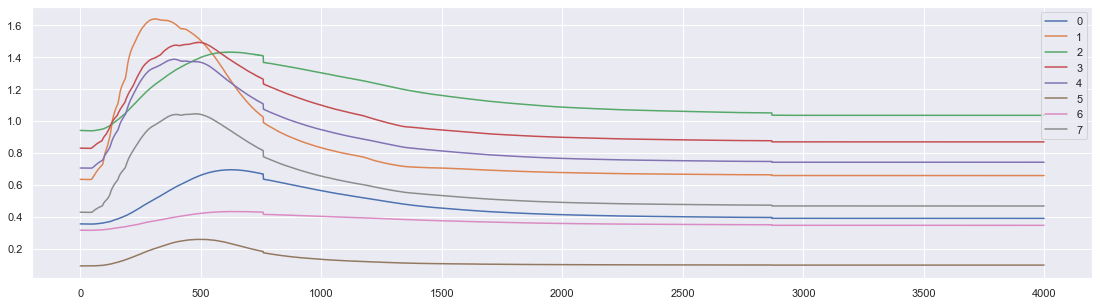

In [34]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(19,5))
for i in range(8) :
    data_capteurs_smokers[i].plot(label=i)
plt.legend()

### COPD

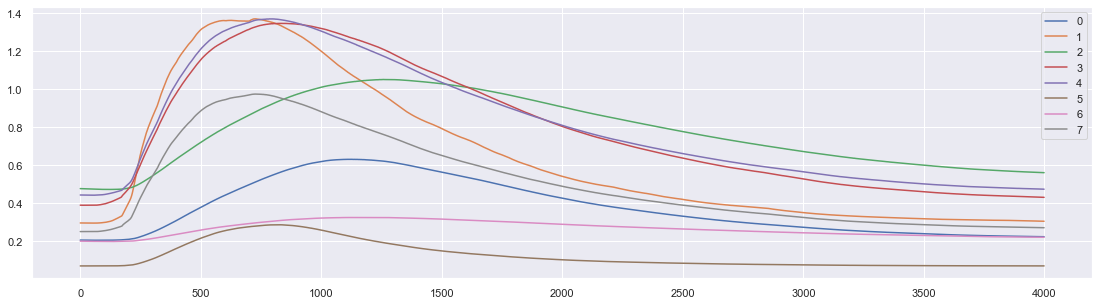

In [35]:
data_capteurs_copd = []
for i in range(8) : 
    data = data_copd[i]
    for j in range(1,40) :
        data += data_copd[i+8*j]
    data_capteurs_copd.append(list(data))
data_capteurs_copd = pd.DataFrame(data_capteurs_copd)
data_capteurs_copd = data_capteurs_copd.T
data_capteurs_copd /= 40
plt.figure(figsize=(19,5))
for i in range(8) :
    data_capteurs_copd[i].plot(label=i)
plt.legend()

### CONTROL

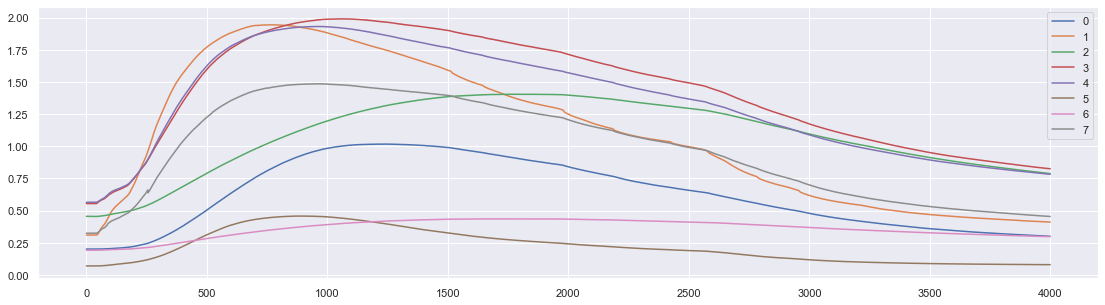

In [36]:
data_capteurs_control = []
for i in range(8) : 
    data = data_control[i]
    for j in range(1,20) :
        data += data_control[i+8*j]
    data_capteurs_control.append(list(data))
data_capteurs_control = pd.DataFrame(data_capteurs_control)
data_capteurs_control = data_capteurs_control.T
data_capteurs_control /= 20
plt.figure(figsize=(19,5))
for i in range(8) :
    data_capteurs_control[i].plot(label=i)
plt.legend()

### AIR

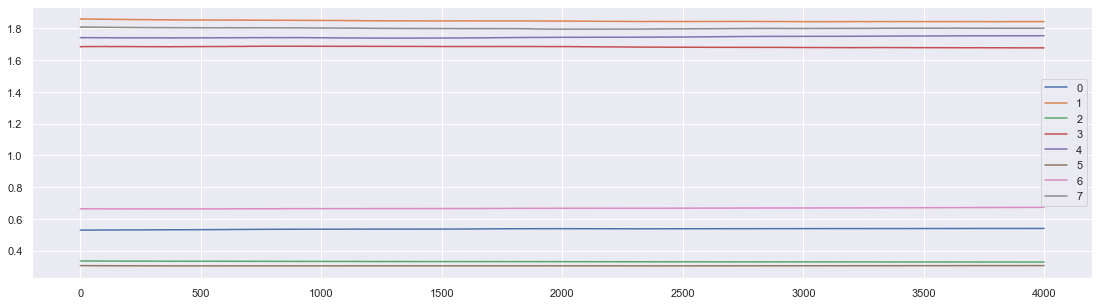

In [37]:
data_capteurs_air = []
for i in range(8) : 
    data = data_air[i]
    for j in range(1,10) :
        data += data_air[i+8*j]
    data_capteurs_air.append(list(data))
data_capteurs_air = pd.DataFrame(data_capteurs_air)
data_capteurs_air = data_capteurs_air.T
data_capteurs_air /= 10
plt.figure(figsize=(19,5))
for i in range(8) :
    data_capteurs_air[i].plot(label=i)
plt.legend()

### Visualisation globale

Text(0.5, 1.0, 'Air')

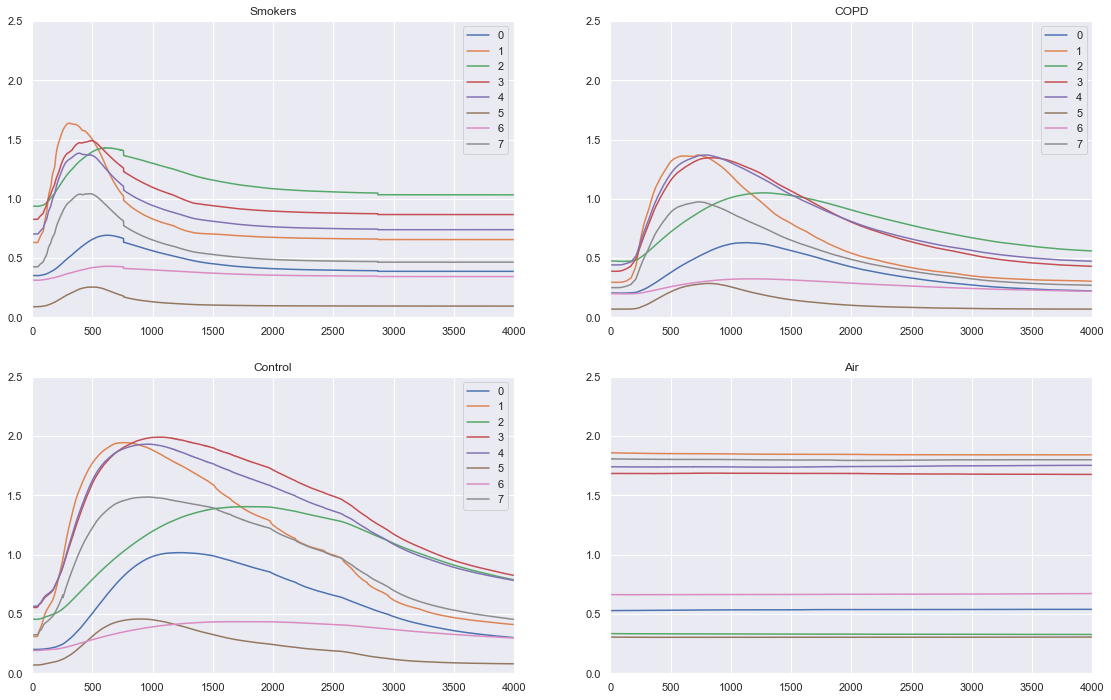

In [38]:
plt.figure(figsize=(19,12))
ax1 = plt.subplot(2, 2, 1)
ax1.set_xlim(left=0, right=4000)
ax1.set_ylim(bottom=0, top=2.5)
for i in range(8) :
    ax1.plot(data_capteurs_smokers[i], label=i)
plt.legend()
plt.title("Smokers")

ax2 = plt.subplot(2, 2, 2, sharey=ax1, sharex=ax1)
for i in range(8) :
    ax2.plot(data_capteurs_copd[i],label=i)
plt.legend()
plt.title("COPD")

ax3 = plt.subplot(2, 2, 3, sharey=ax1, sharex=ax1)
for i in range(8) :
    ax3.plot(data_capteurs_control[i],label=i)
plt.legend()
plt.title("Control")

ax4 = plt.subplot(2, 2, 4, sharey=ax1, sharex=ax1)
for i in range(8) :
    ax4.plot(data_capteurs_air[i])
plt.title("Air")

## Préparation des données
On a dans nos datasets 4000 échantillons par capteurs, et on a 8 capteurs pour chaque cas. On peut procéder de différente façon pour avoir les données sous forme d'images : 
- Utilisation de transformation : transformation de Fourier...
- Restructuration des données 
On tentera aussi d'utiliser les données directement en tant que signal en utilisation des convolution à 1 dimension

Etape supplémentaire pour nous permettre de mettre les valeurs de 0 à 255 pour ensuite les enregistrer sous forme d'images (en soit on devrait les scaler de 0 à 1)

In [180]:
def image_generator(data, samples,path_to_save) :
    images = data.copy()
    images = (images.T).to_numpy()
    scaler = MinMaxScaler(feature_range=(0,255))
    scaler.fit(images)
    images = scaler.transform(images)
    for i in range(samples) :
        signal = images[8*i:8*(i+1)]
        signal = np.reshape(signal, (200,160))
        signal = signal.astype(np.uint8)
        full_path = os.path.join(path_to_save, f'{i+1}.jpeg')
        im = Image.fromarray(signal)
        im.save(full_path)

In [181]:
path_to_smokers = "./images/smokers"
path_to_air = "./images/air"
path_to_control = "./images/control"
path_to_copd = "./images/copd"

In [183]:
image_generator(data_smokers, 8, path_to_smokers)
image_generator(data_air, 10, path_to_air)
image_generator(data_control, 20, path_to_control)
image_generator(data_copd, 40, path_to_copd)

Les images ayant été enregistrée, on passe maintenant à l'enregistrement des tableaux numpy sous forme de réel (float) directement dans des fichiers csv

In [189]:
def text_generator(data, samples,path_to_save) :
    images = data.copy()
    images = (images.T).to_numpy()
    scaler = MinMaxScaler(feature_range=(0,255))
    scaler.fit(images)
    images = scaler.transform(images)
    for i in range(samples) :
        signal = images[8*i:8*(i+1)]
        signal = np.reshape(signal, (200,160))
        full_path = os.path.join(path_to_save, f'{i+1}.csv')
        signal = pd.DataFrame(signal)
        signal.to_csv(full_path, index=False)

In [185]:
numpy_to_smokers = "./numpy_arrays/smokers"
numpy_to_air = "./numpy_arrays/air"
numpy_to_control = "./numpy_arrays/control"
numpy_to_copd = "./numpy_arrays/copd"

In [190]:
text_generator(data_smokers, 8, numpy_to_smokers)
text_generator(data_air, 10, numpy_to_air)
text_generator(data_control, 20, numpy_to_control)
text_generator(data_copd, 40, numpy_to_copd)

In [191]:
data = pd.read_csv('./numpy_arrays/control/10.csv')
data

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,54.553790,54.553790,54.242054,54.242054,54.553790,54.553790,54.553790,54.242054,54.242054,54.242054,...,24.807692,24.765669,24.737733,24.839527,24.682048,24.640449,24.612795,24.571429,24.557671,24.516490
1,24.489112,24.448161,24.420935,24.535595,24.481132,24.440443,24.426910,24.386401,24.359470,24.319184,...,26.599799,26.714286,26.828657,26.828657,26.942914,26.929429,27.184685,27.298649,27.285000,27.285000
2,27.398801,27.512488,27.626061,27.626061,27.739521,27.852868,27.739521,27.852868,27.966102,28.079223,...,45.052109,45.029762,45.260288,45.237859,45.468053,45.468053,45.571782,45.675408,45.778932,45.882353
3,45.985672,46.088889,46.214815,46.192004,46.397929,46.397929,46.580502,46.534678,46.591356,46.522805,...,61.142298,61.337538,61.505867,61.673904,61.895354,61.952278,62.062907,62.230169,62.424177,62.618016
4,62.811688,63.005193,63.198529,63.391699,63.557235,63.750000,63.860104,64.052654,64.245039,64.327296,...,91.878194,92.095400,92.351939,92.569237,92.786536,93.003835,93.043478,93.260870,93.478261,93.735608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,64.436961,64.436961,64.196765,64.196765,64.334232,64.231392,64.231392,64.368932,64.300756,64.163067,...,66.620261,66.699288,66.738872,66.666667,66.706302,66.745985,66.785714,66.977367,66.905188,66.832836
196,66.872760,66.912732,66.992819,67.032934,67.073098,67.113309,67.113309,67.193878,67.121394,67.161756,...,70.175729,70.409182,70.644192,70.456059,70.268924,70.315615,70.456059,70.691383,70.757373,70.615385
197,70.380000,70.426951,70.568182,70.804829,71.043069,70.681208,70.491968,70.539183,70.633803,70.871467,...,71.918397,72.021505,72.124910,72.280576,72.228613,71.890244,71.890244,71.941852,72.045291,72.121212
198,72.253064,72.045291,72.045291,72.097122,72.201009,72.409682,72.409682,72.017291,72.017291,72.069214,...,72.609517,72.554717,72.500000,72.307692,72.362264,72.416918,72.526475,72.526475,72.471655,72.471655
